## American-Sign-Language
O ficheiro *sign_mnist_test.csv* contém 7172 exemplos de teste de gestos.

Os dados de teste (7172 casos) têm uma linha de cabeçalho de rótulo, pixel1, pixel2 ... pixel784 que representa uma única imagem de 28x28 pixels com valores em tons de cinza entre 0-255. Os dados de imagem do gesto de mão original representavam vários utilizadores repetindo o gesto em diferentes fundos.

Cada um desses exemplos de teste torna-se uma única linha no array X. Isso dá uma (7172, 785) forma X, onde em cada linha estão os pixels de uma imagem.

Y é um vetor de forma (7172, 1) dos rótulos do conjunto de teste. Os dados foram rotulados da seguinte maneira: o índice 0 corresponde a A, o índice 1 corresponde a B, o índice 2 corresponde a C e assim sucessivamente. É de saliantar que não existe dados para os índice 9 e 25, uma vez que estes gestos apresentam movimentos.

In [5]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.io import loadmat
#import sys
#from PIL import Image
#import itertools
#from sklearn.svm import SVC
#from sklearn.preprocessing import LabelBinarizer
#from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns

In [6]:
# get train data 
dataTrain = pd.read_csv('sign_mnist_train.csv')

yTrain = dataTrain['label'].values
dataTrain.drop('label', axis = 1, inplace = True)

# get test data 
dataTest = pd.read_csv('sign_mnist_test.csv')
yTest = dataTest['label'].values
dataTest.drop('label', axis = 1, inplace = True)
dataTest.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


<AxesSubplot:ylabel='count'>

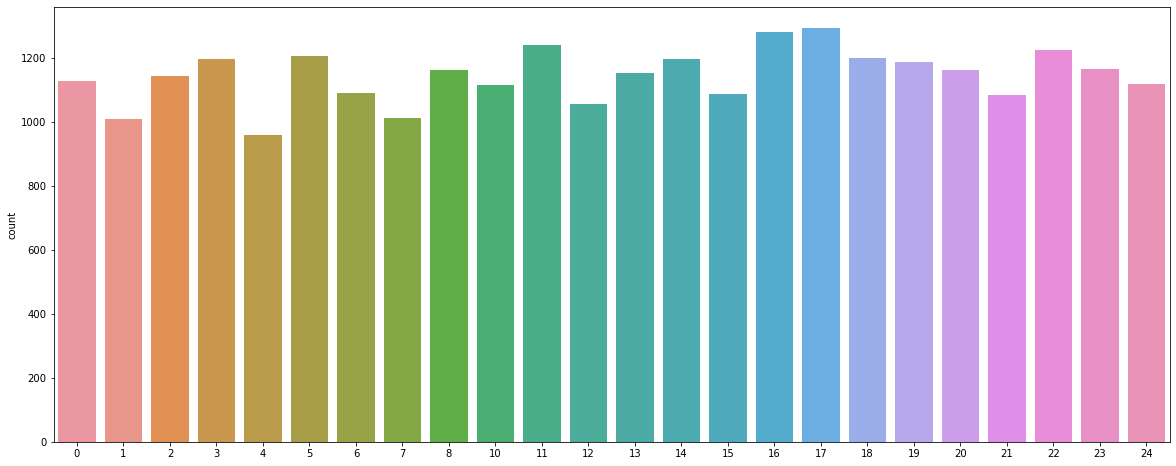

In [7]:
#Numero de vezes que aparece uma letra do alfabeto (a=0,b=1,..)
plt.figure(figsize = (20,8))
sns.countplot(x =yTrain)

In [8]:
# get train data to array
xTrain = dataTrain.values

# get test data to array
xTest = dataTest.values

# get all letters
unique_val = np.array(yTrain)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [9]:
xTrain = np.array(xTrain.reshape(-1,28,28,1))
xTest = np.array(xTest.reshape(-1,28,28,1))
print(xTrain.shape)
print(xTest.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


> "-1" especifica que esta dimensão no eixo atual deve ser calculada dinamicamente de acordo com a regra de que os elementos totais do tensor permanecem inalterados. Isso nos permite tratar batch_size (parâmetro com valor -1) como um hiperparâmetro que podemos ajustar.

In [11]:
# convert multi-class labels to binary labels (belong or does not belong to the class)
lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(yTrain)
yTest = lbTest.fit_transform(yTest)
print(yTrain)
print(yTest)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


Text(0.5, 0.98, 'Grayscale images')

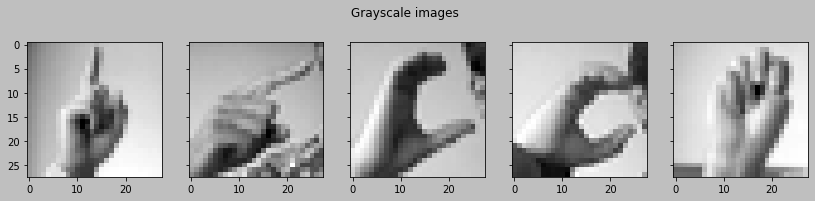

In [12]:
# show one image of train dataset 
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(14, 3), sharey=True)
for i in range(5): 
        axs[i].imshow(xTrain[i].reshape(28,28),cmap='gray')
fig.suptitle('Grayscale images')



In [221]:
batch_size = 128
# number of classes
num_classes = 24
epochs = 5

From the definition of tensorflow.keras documentation the **Sequential** model is a linear stack of layers.You can create a Sequential model by passing a list of layer instances to the constructor.
**kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
**activation**: Activation function to use. If you don't specify anything, no activation is applied (see tensorflow.keras.activations).
**input shape**: 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

In [222]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [223]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

In [224]:
history = model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs=epochs, batch_size=batch_size)

Epoch 1/5
215/215 [==============================] - 21s 98ms/step - loss: 4.6983 - accuracy: 0.0585 - val_loss: 1.8612 - val_accuracy: 0.4612
Epoch 2/5
215/215 [==============================] - 22s 102ms/step - loss: 1.8867 - accuracy: 0.3910 - val_loss: 0.8735 - val_accuracy: 0.7232
Epoch 3/5
215/215 [==============================] - 21s 100ms/step - loss: 0.9261 - accuracy: 0.6872 - val_loss: 0.4925 - val_accuracy: 0.8387
Epoch 4/5
215/215 [==============================] - 21s 100ms/step - loss: 0.5580 - accuracy: 0.8108 - val_loss: 0.3218 - val_accuracy: 0.8982
Epoch 5/5
215/215 [==============================] - 21s 99ms/step - loss: 0.3571 - accuracy: 0.8843 - val_loss: 0.2694 - val_accuracy: 0.9241


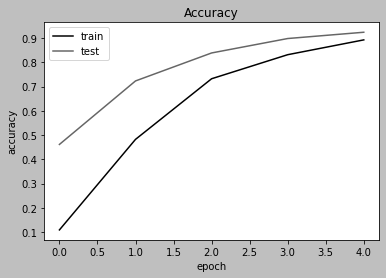

In [260]:
# accurary plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [281]:
#Rita este código é para dar load à network para não termos de estar sempre a compilar aquelas 100 linhas que
#demoram 30min, neste momento está epochs = 5 mas podes mudar para 100 e depois só tens de ler este ficheiro.
new_model = tensorflow.keras.models.load_model('sign_language')
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)         

In [274]:
model.save('sign_language')

INFO:tensorflow:Assets written to: sign_language/assets


In [276]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)         

In [3]:
alphabet = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    proba = model.predict(image)
    print(proba)
    idx = np.argmax(proba)
    return alphabet[idx]

In [4]:
classify(xTrain[0]*255)


NameError: name 'xTrain' is not defined

In [ ]:
print(yTrain[0])

In [272]:
#RITA, isto é um experimento para provar que se mudarmos alguns pixeis da imagem, a Letra é a mesma,
#mas se mudarmos pixeis a mais a imagem diz que é outra letra.
arr = []
arr = xTrain[0].copy()
arr[0] = 90
arr[1] = 90
#arr[5] = 90

In [273]:
classify(arr*255) # igual a xTrain[0] mas com alterações dos valores do array xTrain[0]

'D'